# 01. PyTorch Workflow Fundamentals

In [127]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn

In [128]:
weight = 0.3
bias = 0.5

#X = torch.arange(0, 10, 0.3).unsqueeze(dim= 1)
X = torch.arange(0, 10, 0.3)
y = weight * X + bias

X, y

(tensor([0.0000, 0.3000, 0.6000, 0.9000, 1.2000, 1.5000, 1.8000, 2.1000, 2.4000,
         2.7000, 3.0000, 3.3000, 3.6000, 3.9000, 4.2000, 4.5000, 4.8000, 5.1000,
         5.4000, 5.7000, 6.0000, 6.3000, 6.6000, 6.9000, 7.2000, 7.5000, 7.8000,
         8.1000, 8.4000, 8.7000, 9.0000, 9.3000, 9.6000, 9.9000]),
 tensor([0.5000, 0.5900, 0.6800, 0.7700, 0.8600, 0.9500, 1.0400, 1.1300, 1.2200,
         1.3100, 1.4000, 1.4900, 1.5800, 1.6700, 1.7600, 1.8500, 1.9400, 2.0300,
         2.1200, 2.2100, 2.3000, 2.3900, 2.4800, 2.5700, 2.6600, 2.7500, 2.8400,
         2.9300, 3.0200, 3.1100, 3.2000, 3.2900, 3.3800, 3.4700]))

In [129]:
stop_point = int(0.8 * len(X))
X_train, y_train, X_test, y_test = X[:stop_point], y[:stop_point], X[stop_point:], y[stop_point:]
X_train, y_train, X_test, y_test

(tensor([0.0000, 0.3000, 0.6000, 0.9000, 1.2000, 1.5000, 1.8000, 2.1000, 2.4000,
         2.7000, 3.0000, 3.3000, 3.6000, 3.9000, 4.2000, 4.5000, 4.8000, 5.1000,
         5.4000, 5.7000, 6.0000, 6.3000, 6.6000, 6.9000, 7.2000, 7.5000, 7.8000]),
 tensor([0.5000, 0.5900, 0.6800, 0.7700, 0.8600, 0.9500, 1.0400, 1.1300, 1.2200,
         1.3100, 1.4000, 1.4900, 1.5800, 1.6700, 1.7600, 1.8500, 1.9400, 2.0300,
         2.1200, 2.2100, 2.3000, 2.3900, 2.4800, 2.5700, 2.6600, 2.7500, 2.8400]),
 tensor([8.1000, 8.4000, 8.7000, 9.0000, 9.3000, 9.6000, 9.9000]),
 tensor([2.9300, 3.0200, 3.1100, 3.2000, 3.2900, 3.3800, 3.4700]))

In [130]:
def plot_graph(X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test, prediction = None):
    plt.figure(figsize=(10,7))
    plt.scatter(X_train, y_train, c="r", s=4, label= "Training data")
    plt.scatter(X_test, y_test, c="g", s=4, label= "Test data")
    if prediction is not None:
        plt.scatter(X_test, y_preds, c="b", s=4, label= "Predicted data")
    plt.legend(prop={"size": 14});
    plt.show()

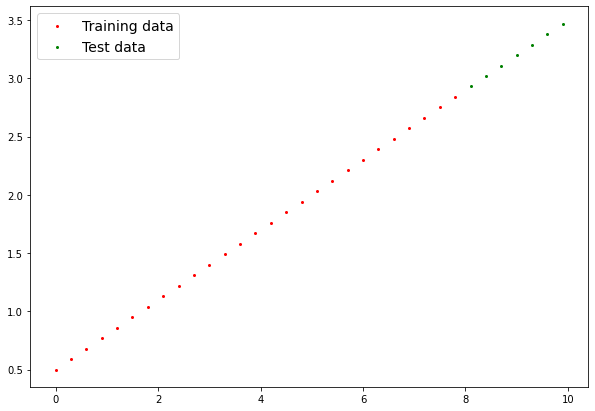

In [131]:
plot_graph()

## Build model

In [132]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.rand(1,), requires_grad= True)
        
        self.bias = nn.Parameter(torch.rand(1,), requires_grad= True)
        
    def forward(self, x):
        return self.weight * x + self.bias

In [133]:
model = LinearRegressionModel()

In [134]:
model.state_dict()

OrderedDict([('weight', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [135]:
# Make predictions with model
with torch.inference_mode(): 
    y_preds = model(X_test)

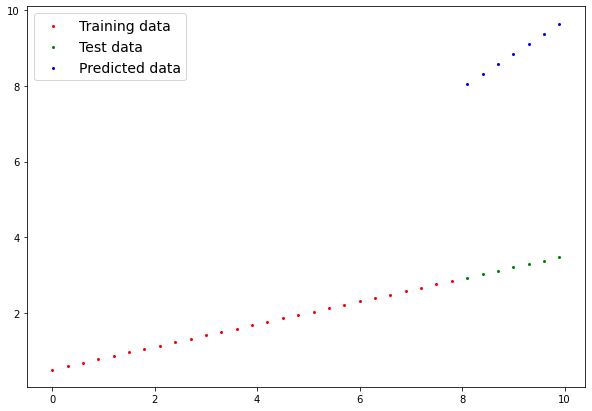

In [136]:
plot_graph(prediction= y_preds)

In [137]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params= model.parameters(), lr = 0.001)

In [138]:
torch.manual_seed(42)
epochs = 1000
for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_fn(test_pred, y_test)
        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | Train Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Train Loss: 2.6858537197113037 | Test Loss: 5.619327545166016
Epoch: 10 | Train Loss: 2.523754596710205 | Test Loss: 5.258327960968018
Epoch: 20 | Train Loss: 2.3616549968719482 | Test Loss: 4.897328853607178
Epoch: 30 | Train Loss: 2.1995556354522705 | Test Loss: 4.536329746246338
Epoch: 40 | Train Loss: 2.0374557971954346 | Test Loss: 4.175330638885498
Epoch: 50 | Train Loss: 1.8753563165664673 | Test Loss: 3.814331531524658
Epoch: 60 | Train Loss: 1.7132568359375 | Test Loss: 3.4533329010009766
Epoch: 70 | Train Loss: 1.5511573553085327 | Test Loss: 3.0923333168029785
Epoch: 80 | Train Loss: 1.3890577554702759 | Test Loss: 2.7313344478607178
Epoch: 90 | Train Loss: 1.226958155632019 | Test Loss: 2.370335340499878
Epoch: 100 | Train Loss: 1.0648586750030518 | Test Loss: 2.009336471557617
Epoch: 110 | Train Loss: 0.9027590751647949 | Test Loss: 1.6483371257781982
Epoch: 120 | Train Loss: 0.7406595945358276 | Test Loss: 1.2873380184173584
Epoch: 130 | Train Loss: 0.578559935

In [139]:
# 1. Set the model in evaluation mode
model.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model(X_test)
y_preds

tensor([2.9390, 3.0293, 3.1196, 3.2099, 3.3002, 3.3905, 3.4808])

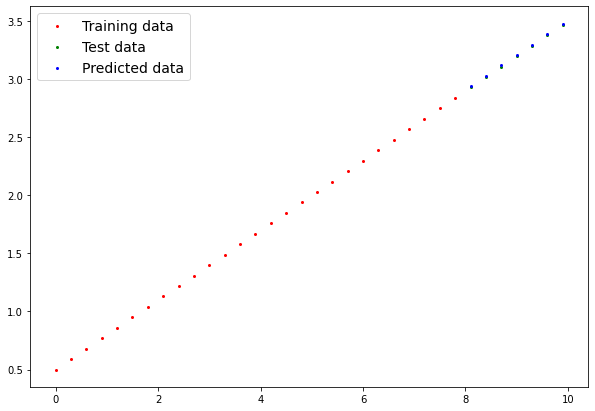

In [140]:
plot_graph(prediction= y_preds)

In [141]:
model.state_dict()

OrderedDict([('weight', tensor([0.3010])), ('bias', tensor([0.5009]))])

## Save and load the model

### Save

In [142]:
from pathlib import Path

Model_path = Path('models')
Model_path.mkdir(parents= True, exist_ok= True)

Model_name = "01_pytorch_workflow_model_0.pth"
Model_save_path = Model_path / Model_name

torch.save(obj= model.state_dict(), f= Model_save_path)

### Load

In [143]:
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(f= Model_save_path))

<All keys matched successfully>

In [144]:
loaded_model.state_dict()

OrderedDict([('weight', tensor([0.3010])), ('bias', tensor([0.5009]))])

### Evaluate model

In [145]:
loaded_model.eval()

LinearRegressionModel()

In [147]:
with torch.inference_mode():
    loaded_model_pred = loaded_model(X_test)

In [148]:
loaded_model_pred == y_preds

tensor([True, True, True, True, True, True, True])